In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


# Implementation of the Chi-Square function detailed in DocDB:21258

This function takes into account the bin-to-bin corellation of the histogram and prevents the need for random seeds. Once the chi-square function is definned, the fit proceeds largely as normal. Here we will preform a sanity check, fitting a histogram with the new chi-square and the old one.

---

First we need to take an existing histogram, find the corellations, and create the covariance matrix

In [2]:
f = r.TFile("/home/jlab/g-2/slidingScaleFits/data/EndGame4042BSeeds0.root")
#f.ls()

h3 = f.Get("clustersAndCoincidencesRand/clusters").Clone()

In [3]:
h3.GetYaxis().SetRangeUser(1700,3200)
h = h3.Project3D("x").Clone("h")
h.SetDirectory(0)

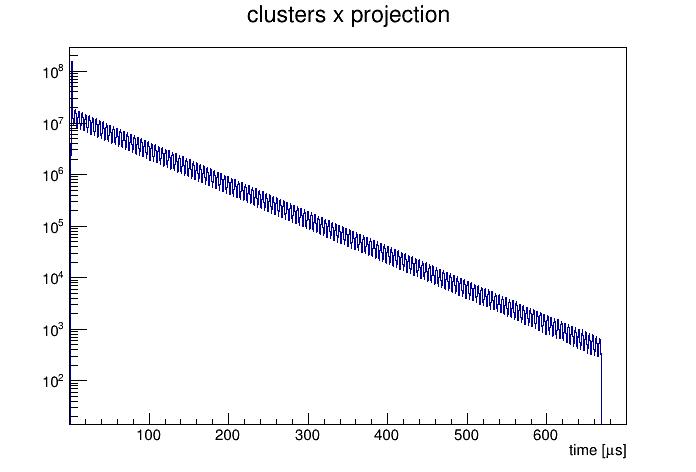

In [4]:
c = r.TCanvas()
h.Draw()
#h.GetXaxis().SetRangeUser(30,150)
c.SetLogy()
c.Draw()

In [5]:
print(THnToPython(h).keys())

dict_keys(['dimension', 'dataType', 'name', 'title', 'ax0', 'binContents'])


In [6]:
type(h)

ROOT.TH1D

In [7]:
h2 = THnToPython(h)
type(h2)

dict

In [22]:
def generateKernalCorellationMatrix( h ):
    '''
        Takes as input a TH1 histogram (or python dict equivalent) and returns a numpy array of the corellation matrix between bins
    '''
    if("ROOT.TH1" in str(type(h))):
        histDict = THnToPython(h)
    elif("dict" in str(type(h))):
        histDict = h
    else:
        raise ValueError("ERROR: Corellation matrix input type not supported")
        
    #print(histDict.keys())
    #print(histDict['ax0'].keys())
    #print(histDict['ax0']['bins'])
    
    bins=histDict['ax0']['bins']
    corrMatrix = np.zeros((bins,bins))
    
    #print(histDict['binContents'][10])
    
    for i in range(bins):
        try:
            #print(histDict['binContents'][i]['content'])
            corrMatrix[i][i+1] = histDict['binContents'][i]['content']
        except:
            continue
    
    return corrMatrix

In [23]:
ding = generateKernalCorellationMatrix(h)

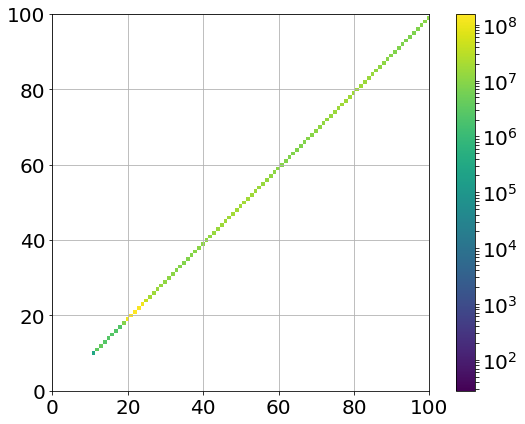

In [35]:
fig,ax = plt.subplots(figsize=(8,6))
plt.imshow(ding, norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.ylim(0,100)
plt.xlim(0,100)
plt.tight_layout()
plt.grid()
plt.show()